In [5]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.linear_model import LinearRegression


import seaborn.apionly as sns
from sklearn.tree import export_graphviz
from IPython.display import Image
from IPython.display import display
%matplotlib inline

def leppard(source_data, prediction_data):
    false_negative = 0
    false_positive = 0
    correct_assessment = 0
    for result in range(0, len(prediction_data)):
        if int(prediction_data[result]) == 1 and int(source_data[result]) == 0:
            false_positive += 1
        if int(prediction_data[result]) == 0 and int(source_data[result]) == 1:
            false_negative += 1
        if (int(prediction_data[result]) == 1 and int(source_data[result]) == 1) or (int(prediction_data[result]) == 0 and int(source_data[result]) == 0):
            correct_assessment += 1
    print ()
    print ("False Positives: ", false_positive)
    print ("False Negatives: ", false_negative)
    print ("Correct Assessment: ", correct_assessment)

    print ("Classification Accuracy: ", 1 - (false_positive + false_negative) / len(source_data))


In [6]:
np.random.seed(9001)
df = pd.read_csv('hw6_dataset.csv')
msk = np.random.rand(len(df)) < 0.75
data_train = df[msk]
data_test = df[~msk]
orig_columns = list(data_train.columns.values)
new_columns = []
for x in range (len(orig_columns) - 1):
    #print(orig_columns[x])
    index_of_e = orig_columns[x].index('e')
    revised_string = orig_columns[x][:index_of_e + 4]
    #print(revised_string)
    converted_string = float(revised_string)
    new_columns.append(str(converted_string))
new_columns.append('Class Label')
#print(new_columns)
data_train.columns = new_columns
data_test.columns = new_columns
data_train.head(10)

y_train = data_train['Class Label'].values
X_train = data_train.values
y_train = y_train.reshape(len(y_train), 1)

y_test = data_test['Class Label'].values
X_test = data_test.values
y_test = y_test.reshape(len(y_test), 1)



In [7]:
df.head()

,-1.439999999999999891e-01,-1.429999999999999882e-01,-1.160000000000000059e-01,-1.029999999999999943e-01,2.260000000000000064e-01,2.099999999999999922e-01,-9.799999999999999822e-01,-7.800000000000000266e-01,-4.739999999999999769e-01,-4.470000000000000084e-01,...,9.250000000000000444e-01,5.160000000000000142e-01,3.439999999999999725e-01,9.060000000000000275e-01,-1.129999999999999893e+00,-5.520000000000000462e-01,5.530000000000000471e-01,-4.169999999999999818e-01,2.560000000000000053e-01,0.000000000000000000e+00
0,-0.01100,0.138,-0.2230,-0.1730,0.188,0.284,-0.0522,-0.256,0.129,0.427,...,-0.593,0.452,0.00785,-0.533,-0.0789,0.705,0.906,0.216,-0.0723,0.0
1,0.21200,-0.313,0.2660,0.2320,-1.190,-1.150,-1.8100,-1.560,-1.250,-1.200,...,-0.816,1.570,0.39400,1.340,-1.1800,-2.700,-0.926,-2.650,-0.0447,0.0
2,0.21500,-0.184,0.0274,0.0494,0.443,0.463,-1.0500,-0.941,-0.531,-0.394,...,0.634,0.111,0.37100,0.859,-0.9930,-0.492,0.363,0.326,-0.0528,0.0
3,0.27900,-0.197,0.1270,0.0973,-0.213,-0.150,-1.3200,-0.994,-1.110,-1.090,...,-0.640,0.485,0.29500,0.403,-1.1200,-0.343,0.468,-0.820,0.4350,0.0
4,0.00922,-0.138,0.1690,0.1540,-0.391,-0.397,-1.6900,-1.450,-0.546,-0.527,...,-0.277,0.699,0.37100,0.481,-1.0600,-0.526,0.550,-0.284,0.1550,0.0


In [9]:
clf = LogisticRegressionCV(
        Cs=list(np.power(10.0, np.arange(-10, 10)))
        ,penalty='l2'
        ,cv=10
        ,random_state=777
        ,fit_intercept=True
        ,solver='newton-cg'
        ,tol=10)
clf.fit(X_train, y_train)
print('\n')
print("The optimized L2 regularization paramater id:", clf.C_)

# The coefficients
print('Estimated beta1: \n', clf.coef_)
print('Estimated beta0: \n', clf.intercept_)

# Scoring
clf_y_pred_test = clf.predict(X_test)
clf_y_pred_test = clf_y_pred_test.reshape(len(clf_y_pred_test), 1)
test_df = pd.DataFrame(clf_y_pred_test)
Total = test_df[0].sum()
print('\n')
print("malignant: ", Total)

pd.set_option('display.max_rows', 1000)
test_df['All Normal'] = 0

# Reset indexes so copy will work
test_df = test_df.reset_index(drop=True)
data_test = data_test.reset_index(drop=True)
test_df['Class Label'] = data_test['Class Label']

# Confusion Matrix
print('\n')
print('Classifier applied to Test Set:') 
leppard(test_df['Class Label'], test_df[0])
print(confusion_matrix(y_test, clf.predict(X_test)))


print('\n')
print('Classifier that predicts all normal:')
leppard(test_df['Class Label'], test_df['All Normal'])
print(confusion_matrix(y_test, test_df['All Normal']))


c:\users\akshitha\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)




The optimized L2 regularization paramater id: [10.]
Estimated beta1: 
 [[-2.15675703e-02  4.57672332e-02  5.87118913e-01  5.01597809e-01
  -2.54420819e-01 -2.18567419e-01  1.68100061e-01 -7.42716068e-02
   1.15897470e-01 -3.84389984e-02 -5.24469406e-02  1.31078405e-01
  -2.18614609e-01  1.63000945e-02  2.81643811e-02 -1.40624669e-02
  -7.47535797e-02 -7.52547705e-02 -1.01655871e-01 -9.82645625e-02
   1.57753700e-01  1.90654416e-02  8.81488442e-02 -3.22963562e-02
   2.91600410e-01 -5.44620414e-02  2.61948057e-02 -9.40194824e-02
  -1.88076526e-02 -3.40947720e-02 -4.57707437e-02  7.21185942e-02
   2.34914779e-01  8.33270520e-02  4.96411398e-02 -6.72526432e-02
   6.36391071e-02  5.50162518e-02 -1.41451473e-02  1.01859455e-02
   1.31628157e-02  1.98233756e-02  2.33209299e-02 -7.50357087e-02
   2.06580962e-02  3.89939132e-02  5.63545215e-02 -1.72732070e-01
  -1.56078573e-01 -6.21999362e-02 -1.59293862e-01  1.10459109e-01
  -4.91734159e-02 -3.82534716e-02 -3.06234710e-02 -2.53074489e-02
  -

In [10]:
def t_repredict(est, t, xtest):
    probs = est.predict_proba(xtest)
    p0 = probs[:,0]
    p1 = probs[:,1]
    ypred = (p1 > t)*1
    return ypred
print('Confusion matrix that predicts all patients to be negative:')
print(confusion_matrix(y_test,t_repredict(clf, 01.00, X_test)))

Confusion matrix that predicts all patients to be negative:
[[16984     0]
 [  104     0]]


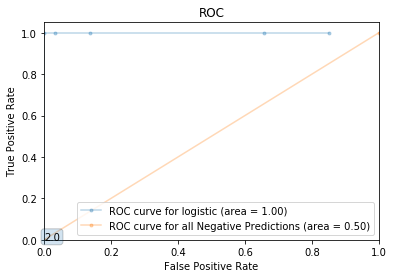

In [11]:
from sklearn.metrics import roc_curve, auc

def make_roc(name, clf, ytest, xtest, ax=None, labe=5, proba=True, skip=0):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:#for stuff like logistic regression
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    else:#for stuff like SVM
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    roc_auc = auc(fpr, tpr)
    if skip:
        l=fpr.shape[0]
        ax.plot(fpr[0:l:skip], tpr[0:l:skip], '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    else:
        ax.plot(fpr, tpr, '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    label_kwargs = {}
    label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.2,
    )
    if labe!=None:    
        for k in range(0, fpr.shape[0],labe):
            #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
            threshold = str(np.round(thresholds[k], 2))
            ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)
    if initial:
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('ROC')
    fpr_0, tpr_0, thresholds_1 = metrics.roc_curve(y_test, t_repredict(clf, 01.00, X_test))
    roc_auc_0 = auc(fpr_0, tpr_0)
    plt.plot(fpr_0, tpr_0, '.-', alpha=0.3, label='ROC curve for all Negative Predictions (area = %0.2f)' % (roc_auc_0))
    ax.legend(loc="lower right")
    return ax

ax=make_roc("logistic",clf, y_test, X_test, labe=100, skip=2)

In [12]:
len(clf.predict_proba(X_test)[:,1])

17088

No handles with labels found to put in legend.


FPR: 0.03144135657089025 TPR 1.0 Threshold 0.0005805368530553129
FPR: 1.0 TPR 1.0 Threshold 8.233913585440455e-37
FPR: 1.0 TPR 1.0 Threshold 8.233913585440455e-37
FPR: 1.0 TPR 1.0 Threshold 8.233913585440455e-37


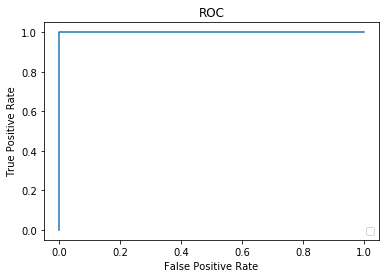

In [13]:
fprs = [0,.1,.5,.9]
fpr, tpr, thresholds=roc_curve(y_test, clf.predict_proba(X_test)[:,1])       
for i in range(len(fpr)):        
    if int(fpr[i] > 0):
                print('FPR:', fpr[i], 'TPR', tpr[i], 'Threshold', thresholds[i] )
                break
for i in range(len(fpr)):             
    if int(fpr[i]) >= .1:
                print('FPR:', fpr[i], 'TPR', tpr[i], 'Threshold', thresholds[i] )
                
for i in range(len(fpr)):                 
    if int(fpr[i]) >= .5:
                print('FPR:', fpr[i], 'TPR', tpr[i], 'Threshold', thresholds[i] ) 
                
for i in range(len(fpr)):      
    if int(fpr[i]) >= .9:
                print('FPR:', fpr[i], 'TPR', tpr[i], 'Threshold', thresholds[i] )  
                
                f, ax = plt.subplots()
                ax.plot(fpr, tpr)
                ax.set_xlabel('False Positive Rate')
                ax.set_ylabel('True Positive Rate')
                ax.set_title('ROC')
                ax.legend(loc="lower right")
           

In [14]:
print('fprs:',fpr)

fprs: [0.         0.         0.         0.03144136 0.03155911 0.13565709
 0.13577485 0.65667687 0.65679463 0.84979981 0.84991757 1.        ]


In [15]:
print('tprs:',tpr)

tprs: [0.         0.00961538 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


In [16]:
print('thresholds:',thresholds)

thresholds: [1.99955010e+00 9.99550103e-01 4.40606742e-01 5.80536853e-04
 5.80130001e-04 2.67749851e-04 2.67700932e-04 5.08770039e-05
 5.08615873e-05 2.21872194e-05 2.21809271e-05 8.23391359e-37]


In [17]:
np.random.seed(9001)
df = pd.read_csv('HW6_dataset_missing.csv')
msk = np.random.rand(len(df)) < 0.75
data_train = df[msk]
data_test = df[~msk]
data_train = data_train.dropna()
data_test = data_test.dropna()

In [18]:
df.head()

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,109,110,111,112,113,114,115,116,117,type
0,0,0.1290,-0.2160,0.2880,0.2370,-0.993,-0.9550,-1.620,-1.470,-1.0100,...,-1.1900,1.1000,0.395,2.060,-1.180,-2.8500,-1.290,-2.100,0.0121,0.0
1,1,0.0989,0.1160,0.3130,0.2810,-0.188,-0.2790,0.173,0.445,0.4320,...,-0.0181,0.2480,-0.869,-0.190,0.451,0.6980,0.363,1.030,-0.2490,0.0
2,2,0.0215,0.1590,0.5790,0.5020,-0.342,-0.2740,-0.172,-0.164,0.2160,...,0.0702,0.0200,0.397,-0.800,0.173,0.7380,0.465,0.440,-0.2880,0.0
3,3,-0.2170,-0.3570,-0.0539,-0.0688,0.445,0.6380,0.436,0.351,0.0401,...,NaN,0.0622,0.269,-0.217,-1.030,0.0276,0.472,-0.390,0.3660,0.0
4,4,-0.0846,0.0166,0.4240,0.3520,-0.259,-0.0947,0.119,-0.162,0.3020,...,0.7190,0.3250,-0.286,-0.528,-0.704,0.8530,0.953,-0.116,-0.1190,0.0


In [19]:
y_train = data_train['type'].values
X_train = data_train.values
y_train = y_train.reshape(len(y_train), 1)

y_test = data_test['type'].values
X_test = data_test.values
y_test = y_test.reshape(len(y_test), 1)


In [20]:
clf = LogisticRegressionCV(
        Cs=list(np.power(10.0, np.arange(-10, 10)))
        ,penalty='l2'
        ,cv=10
        ,random_state=777
        ,fit_intercept=True
        ,solver='newton-cg'
        ,tol=10)
clf.fit(X_train, y_train)

# L2 Regularization parameter
print('\n')
print("The optimized L2 regularization paramater id:", clf.C_)

# The coefficients
print('Estimated beta1: \n', clf.coef_)
print('Estimated beta0: \n', clf.intercept_)

# Metrics
print('\n')
print('Test Set Confusion matrix:') 
print(confusion_matrix(y_test, clf.predict(X_test)))

train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
y_prediction = clf.predict(X_test)
test_precision = precision_score(y_test, y_prediction)
print('The training classification accuracy is: ', train_score)
print('The testing classification accuracy is: ', test_score)
print('The precision score on the test set is: ', test_precision)

c:\users\akshitha\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\akshitha\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
c:\users\akshitha\appdata\local\programs\python\python37-32\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\akshitha\appdata\local\programs\python\python37-32\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line 



The optimized L2 regularization paramater id: [1.e-10]
Estimated beta1: 
 [[-1.17808017e-05 -1.78234266e-11 -2.31175571e-11  1.41725318e-10
   1.18659272e-10 -2.39497612e-10 -2.27439833e-10 -6.86226828e-11
  -8.40750206e-11  8.00425581e-10  5.77491711e-10 -1.72371871e-11
  -8.36812521e-12 -2.06867973e-10  6.54907848e-11 -6.54518372e-11
  -6.05532801e-11 -2.35683854e-10 -5.53486215e-11  5.87403517e-11
   1.83268337e-10  1.90492741e-10  6.96741116e-13  1.06296161e-10
   1.56050918e-10  1.85817834e-10  1.57395059e-10  2.28944105e-10
  -1.40218151e-10  2.34228351e-10 -1.28059283e-10  2.08089547e-11
  -1.88814843e-11  2.92377986e-11  3.32047060e-11  2.46338585e-10
   4.32449785e-11 -6.38750046e-11 -5.61772017e-11 -2.59920580e-11
  -1.18540883e-10  1.28068940e-10  1.42189068e-10  1.53957248e-10
   5.35933770e-11  1.81548039e-10  2.00309381e-10  1.35793683e-10
  -2.70314930e-10 -1.51130963e-10 -1.37513811e-10 -1.39854945e-10
  -2.97795542e-10 -8.24887496e-11 -3.18339890e-11 -3.57299019e-11


c:\users\akshitha\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [21]:
np.random.seed(9001)
df_2 = pd.read_csv('HW6_dataset_missing.csv')
msk = np.random.rand(len(df)) < 0.75
data_train_2 = df_2[msk]
data_test_2 = df_2[~msk]

In [22]:
for column in data_train_2:
    data_train_2[column] = data_train_2[column].fillna(data_train_2[column].mean())
for column in data_test_2:
    data_test_2[column] = data_test_2[column].fillna(data_train_2[column].mean())
    
y_train = data_train_2['type'].values
X_train = data_train_2.values
y_train = y_train.reshape(len(y_train), 1)

y_test = data_test_2['type'].values
X_test = data_test_2.values
y_test = y_test.reshape(len(y_test), 1)


# Fit a logistic regression classifier to the training set and report the accuracy of the classifier on the test set
clf = LogisticRegressionCV(
        Cs=list(np.power(10.0, np.arange(-10, 10)))
        ,penalty='l2'
        ,cv=10
        ,random_state=777
        ,fit_intercept=True
        ,solver='newton-cg'
        ,tol=10)
clf.fit(X_train, y_train)

# L2 Regularization parameter
print('\n')
print("The optimized L2 regularization paramater id:", clf.C_)

# The coefficients
print('Estimated beta1: \n', clf.coef_)
print('Estimated beta0: \n', clf.intercept_)

# Metrics
print('\n')
print('Test Set Confusion matrix:') 
print(confusion_matrix(y_test, clf.predict(X_test)))

train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
y_prediction = clf.predict(X_test)
test_precision = precision_score(y_test, y_prediction)
print('The training classification accuracy is: ', train_score)
print('The testing classification accuracy is: ', test_score)
print('The precision score on the test set is: ', test_precision)

c:\users\akshitha\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\akshitha\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\users\akshitha\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d arra



The optimized L2 regularization paramater id: [10.]
Estimated beta1: 
 [[-4.09829729e-05 -1.11597651e-01  1.90828495e-01  3.12083456e-01
   2.70588979e-01 -2.44093318e-01 -2.51309857e-01  1.00144970e-01
   6.33574371e-02  1.02463399e-01 -7.45706563e-02  5.89673270e-02
   3.70456779e-02 -1.50827027e-01 -7.65060250e-03 -1.54938053e-01
  -2.41474560e-01  3.95173677e-01 -7.27504605e-02 -4.89959500e-02
   1.49628333e-01  5.94759450e-02 -1.11637424e-01  1.98428539e-01
   5.04326598e-01  2.60594337e-01  1.09637813e-01  4.29697744e-02
  -1.25814415e-01 -7.70718519e-02  1.50361836e-01 -1.18808162e-01
  -1.30270895e-01  2.03546856e-01  1.64047171e-01  5.28007894e-02
   1.38039847e-01 -1.88845988e-01 -1.42547268e-01  1.38626011e-01
   1.66398258e-01 -1.39268905e-01 -1.01931250e-01 -1.15335670e-01
  -1.11961390e-01  1.56329743e-01  1.31916600e-01  1.39991727e-01
  -2.55843451e-01 -7.29622670e-02  2.11638136e-02 -8.86888583e-02
   5.28521562e-02  4.11360491e-04 -2.83490112e-02 -2.72391296e-02
  -

In [24]:
#Split the data set into a training set and a testing set
np.random.seed(9001)
df_imp = pd.read_csv('HW6_dataset_missing.csv')
msk = np.random.rand(len(df)) < 0.75
data_train_imp = df_imp[msk]
#print(data_train_imp)
data_test_imp = df_imp[~msk]
data_train_full = data_train_imp.dropna()

data_test_imp.iloc[:, 91]
#y_train_imp = data_train['type'].values
#X_train_imp = data_train.values
#y_train_imp = y_train.reshape(len(y_train), 1)

#y_test_imp = data_test_imp['type'].values
#X_test_imp = data_test_imp.values
#y_test_imp = y_test_imp.reshape(len(y_test), 1)


1        0.027
2       -0.527
4       -1.550
7        1.270
8        0.571
         ...  
24980    0.100
24988   -0.634
24989   -0.194
24993   -1.930
24998    1.260
Name: 91, Length: 6125, dtype: float64

In [25]:
for i in range(1,117,1):
    y_train_imp = data_train_full.iloc[:, i]
    #print(y_train_imp)
    #print(y_train_imp.shape())
    X_train_imp = data_train_full.loc[:, data_train_full.columns != i]
    #print(X_train_imp)
    #print(X_train_imp.shape())
    y_train_imp = y_train_imp.reshape(len(y_train_imp), 1)
    #print(y_train_imp)
    
    # regress column i on all other columns with randomness
    regress = LinearRegression()
    regress.fit(X_train_imp,y_train_imp)
    y_hat = regress.predict(X_train_imp)
    
    X_missing = data_test_imp[data_test_imp.iloc[:, i].isnull()]
   
    print (X_missing)
    if not X_missing:
        print("X ", i, "complete; nothing missing")
        continue
    else:
        print(X_missing)
        print(TEST_missing)
        

    y_missing = regress.predict(X_missing)
    y_missing_noise = y_missing+np.random.normal(loc=0,scale=np.sqrt(mean_squared_error(y_train_imp,y_hat)),size=y_missing.shape[0])

        
     
    missing_index = data_train_imp.i[data_train_imp.i.isnull()].index
    missing_series = pd.Series(data = y_missing_noise, index = missing_index)
    
    #back to the data set with missingness and impute the predictions
    data_train_imp2 = data_train_imp.copy()
    data_train_imp2[i] = data_train_imp2[i].fillna(missing_series)
    
    # regress on test set
    regress.fit(X_train_imp,y_train_imp)
    y_hat = regress.predict(X_train_imp)
    
    X_missing = data_train_imp[data_train_imp.i.isnull()]
    X_missing = X_missing.reshape(len(X_missing), 1)
    y_missing = regress.predict(X_missing)
    y_missing_noise = y_missing+np.random.normal(loc=0,scale=np.sqrt(mean_squared_error(y_train_imp,y_hat)),size=y_missing.shape[0])
    
    missing_index = data_train_imp.i[data_train_imp.i.isnull()].index
    missing_series = pd.Series(data = y_missing_noise, index = missing_index)
    
    #back to the data set with missingness and impute the predictions
    data_train_imp2 = data_train_imp.copy()
    data_train_imp2[i] = data_train_imp2[i].fillna(missing_series)
    
    # Fit a logistic regression classifier to the training set and report the accuracy of the classifier on the test set
    clf = LogisticRegressionCV(
        Cs=list(np.power(10.0, np.arange(-10, 10)))
        ,penalty='l2'
        ,cv=10
        ,random_state=777
        ,fit_intercept=True
        ,solver='newton-cg'
        ,tol=10)
    clf.fit(X_train, y_train)

    # L2 Regularization parameter
    print('\n')
    print("The optimized L2 regularization paramater id:", clf.C_)

    # The coefficients
    print('Estimated beta1: \n', clf.coef_)
    print('Estimated beta0: \n', clf.intercept_)

    # Metrics
    print('\n')
    print('Test Set Confusion matrix:') 
    print(confusion_matrix(y_test, clf.predict(X_test)))
    
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    y_prediction = clf.predict(X_test)
    test_precision = precision_score(y_test, y_prediction)
    print('The training classification accuracy is: ', train_score)
    print('The testing classification accuracy is: ', test_score)
    print('The precision score on the test set is: ', test_precision)

AttributeError: 'Series' object has no attribute 'reshape'